In [70]:
# importing dependant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df=pd.read_csv("NPHA-doctor-visits.csv")
df

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,2,2,2,2,3,0,0,0,1,0,3,3,1,1
710,3,2,2,2,2,2,1,0,0,0,1,2,3,1,2
711,3,2,4,2,3,3,0,0,0,0,0,3,3,1,1
712,3,2,3,1,3,3,1,0,1,1,1,3,3,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [4]:
df.isna().sum()

Number of Doctors Visited                     0
Age                                           0
Phyiscal Health                               0
Mental Health                                 0
Dental Health                                 0
Employment                                    0
Stress Keeps Patient from Sleeping            0
Medication Keeps Patient from Sleeping        0
Pain Keeps Patient from Sleeping              0
Bathroom Needs Keeps Patient from Sleeping    0
Uknown Keeps Patient from Sleeping            0
Trouble Sleeping                              0
Prescription Sleep Medication                 0
Race                                          0
Gender                                        0
dtype: int64

In [5]:
# statistical summary
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


## Checking unique Values

In [6]:
print("Number of Doctors Visited:",df["Number of Doctors Visited"].unique())
print("Age:",df["Age"].unique())
print("Physical Health:",df["Phyiscal Health"].unique())
print("Mental Health:",df["Mental Health"].unique())
print("Dental Health:",df["Dental Health"].unique())
print("Employment:",df["Employment"].unique())
print("Stress Keeps Patient from Sleeping:",df["Stress Keeps Patient from Sleeping"].unique())
print("Medication Keeps Patient from Sleeping :",df["Medication Keeps Patient from Sleeping"].unique())
print("Pain Keeps Patient from Sleeping:",df["Pain Keeps Patient from Sleeping"].unique())
print("Bathroom Needs Keeps Patient from Sleeping :",df["Bathroom Needs Keeps Patient from Sleeping"].unique())
print("Uknown Keeps Patient from Sleeping:",df["Uknown Keeps Patient from Sleeping"].unique())
print("Trouble Sleeping:",df["Trouble Sleeping"].unique())
print("Prescription Sleep Medication :",df["Prescription Sleep Medication"].unique())
print("Race:",df["Race"].unique())
print("Gender:",df["Gender"].unique())

Number of Doctors Visited: [3 2 1]
Age: [2]
Physical Health: [ 4  3  2  5  1 -1]
Mental Health: [ 3  2  1  4 -1  5]
Dental Health: [ 3  4  1  6  2  5 -1]
Employment: [3 1 2 4]
Stress Keeps Patient from Sleeping: [0 1]
Medication Keeps Patient from Sleeping : [0 1]
Pain Keeps Patient from Sleeping: [0 1]
Bathroom Needs Keeps Patient from Sleeping : [0 1]
Uknown Keeps Patient from Sleeping: [1 0]
Trouble Sleeping: [ 2  3  1 -1]
Prescription Sleep Medication : [ 3  1  2 -1]
Race: [1 4 2 5 3]
Gender: [2 1]


In [7]:
print("Physical Health:",df["Phyiscal Health"].value_counts())
print("Mental Health:",df["Mental Health"].value_counts())
print("Employment:",df["Employment"].value_counts())
print("Race:",df["Race"].value_counts())

Physical Health:  3    291
 2    239
 4    126
 1     36
 5     21
-1      1
Name: Phyiscal Health, dtype: int64
Mental Health:  2    282
 1    219
 3    167
 4     34
-1     10
 5      2
Name: Mental Health, dtype: int64
Employment: 3    592
2     55
1     50
4     17
Name: Employment, dtype: int64
Race: 1    578
2     52
4     44
5     20
3     20
Name: Race, dtype: int64


## DATA VISUALISATION

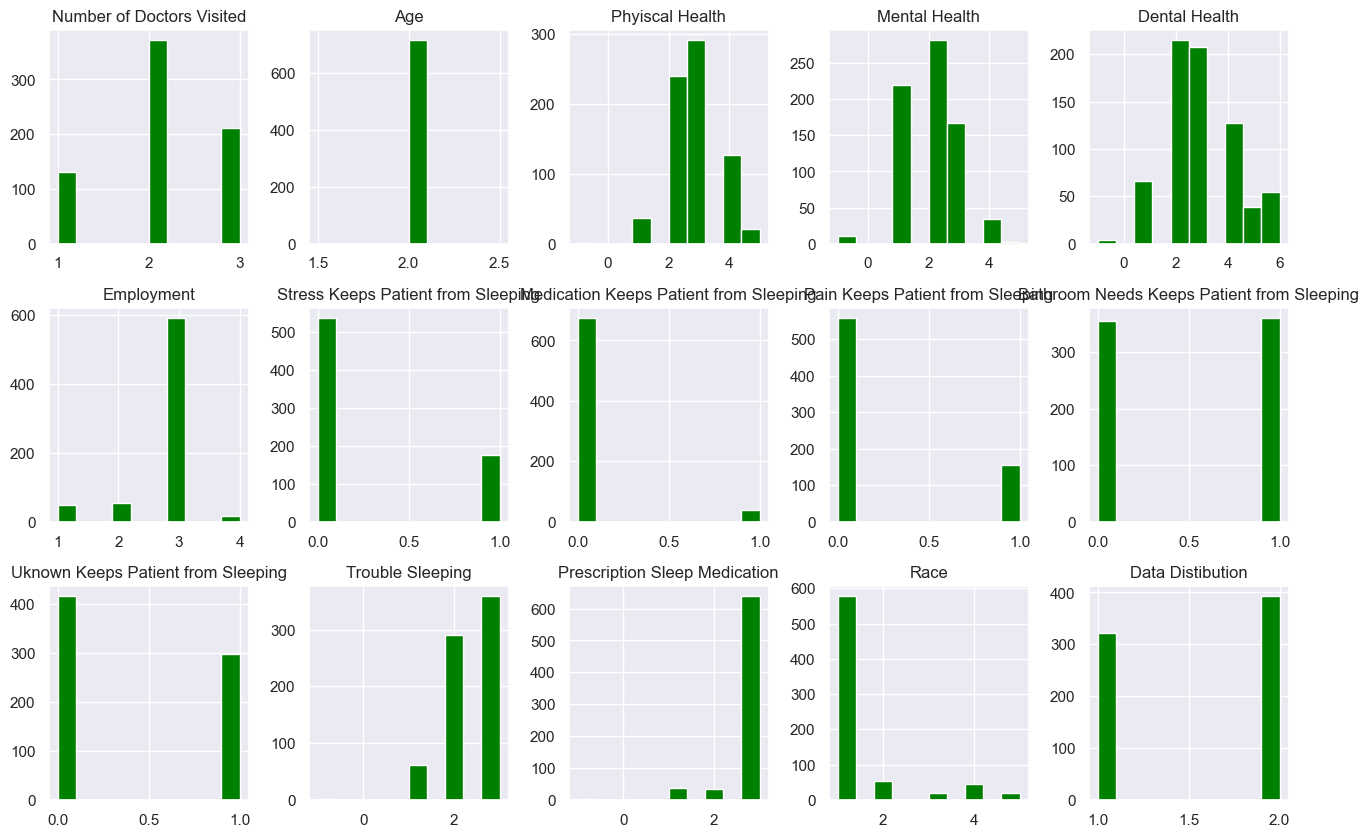

In [8]:
sns.set_theme(style="darkgrid")
df.hist(layout=(3,5), figsize=(16,10), color="green")
plt.title(("Data Distibution"))
plt.show()

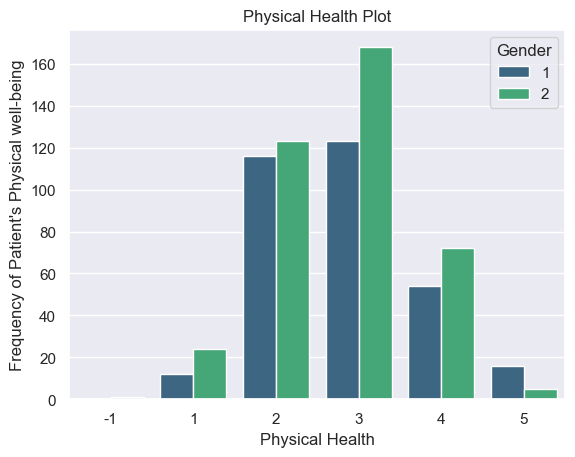

In [9]:
sns.countplot(x="Phyiscal Health", data=df, palette="viridis", hue="Gender")
plt.xlabel("Physical Health")
plt.ylabel("Frequency of Patient's Physical well-being")
plt.title("Physical Health Plot")
plt.show()

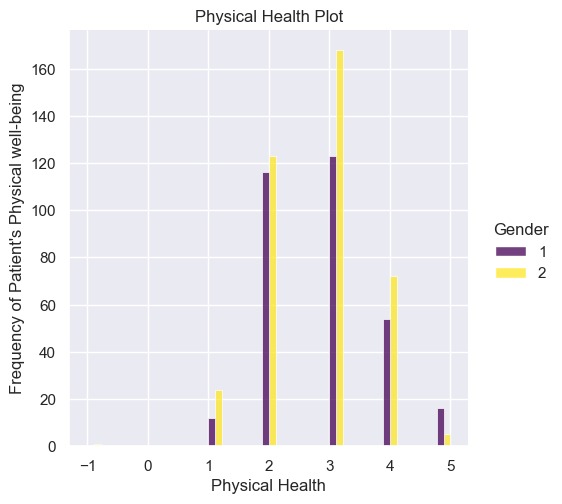

In [10]:
sns.displot(x="Phyiscal Health", data=df, palette="viridis", hue="Gender",multiple="dodge")
plt.xlabel("Physical Health")
plt.ylabel("Frequency of Patient's Physical well-being")
plt.title("Physical Health Plot")
plt.show()

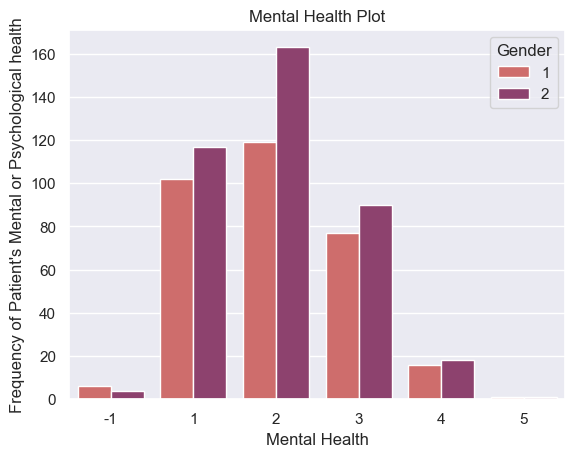

In [11]:
sns.countplot(x="Mental Health", data=df, palette="flare", hue="Gender")
plt.xlabel("Mental Health")
plt.ylabel("Frequency of Patient's Mental or Psychological health")
plt.title("Mental Health Plot")
plt.show()

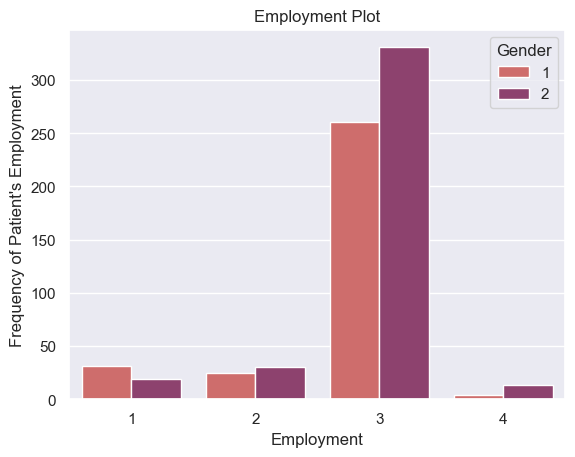

In [12]:
sns.countplot(x="Employment", data=df, palette="flare", hue="Gender")
plt.xlabel("Employment")
plt.ylabel("Frequency of Patient's Employment")
plt.title("Employment Plot")
plt.show()

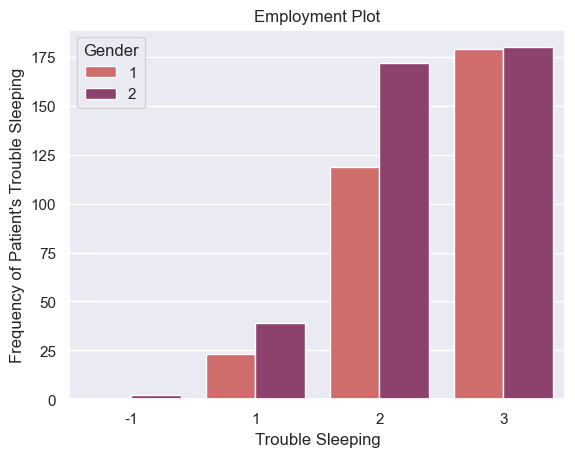

In [13]:
sns.countplot(x="Trouble Sleeping", data=df, palette="flare", hue="Gender")
plt.xlabel("Trouble Sleeping")
plt.ylabel("Frequency of Patient's Trouble Sleeping")
plt.title("Employment Plot")
plt.show()

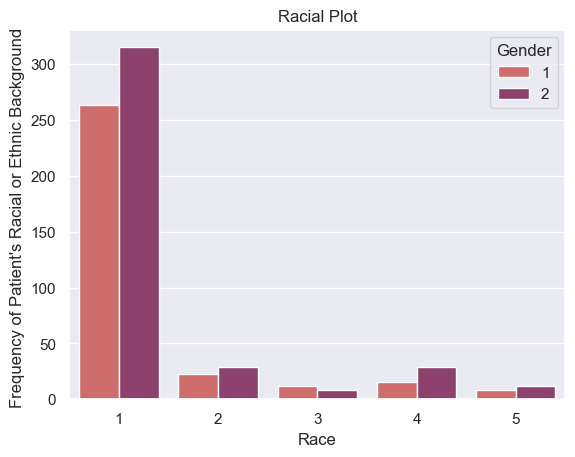

In [14]:
sns.countplot(x="Race", data=df, palette="flare", hue="Gender")
plt.xlabel("Race")
plt.ylabel("Frequency of Patient's Racial or Ethnic Background ")
plt.title("Racial Plot")
plt.show()

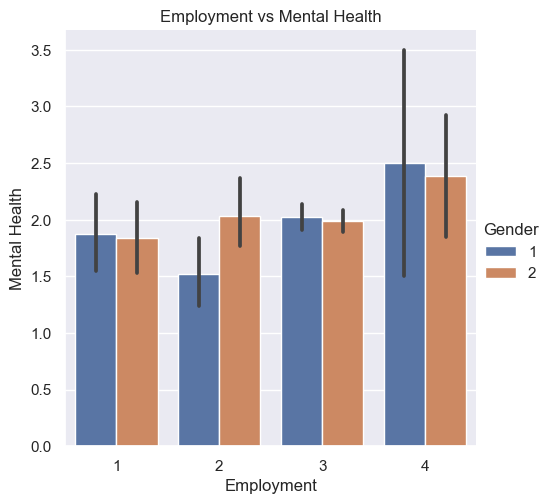

In [15]:
sns.catplot(data=df, x="Employment", y="Mental Health", hue="Gender", kind="bar")
plt.title("Employment vs Mental Health")
plt.show()

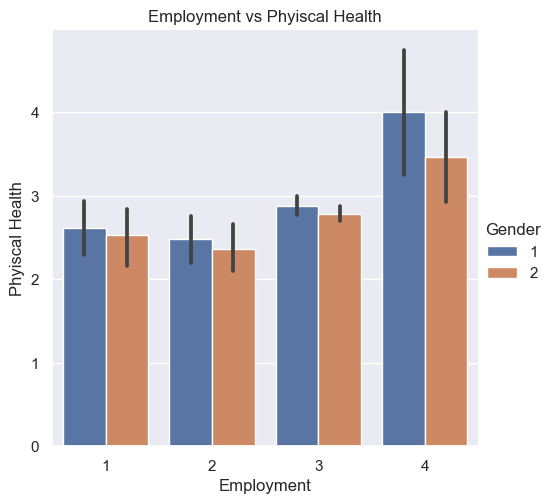

In [16]:
sns.catplot(data=df, x="Employment", y="Phyiscal Health", hue="Gender", kind="bar")
plt.title("Employment vs Phyiscal Health")
plt.show()

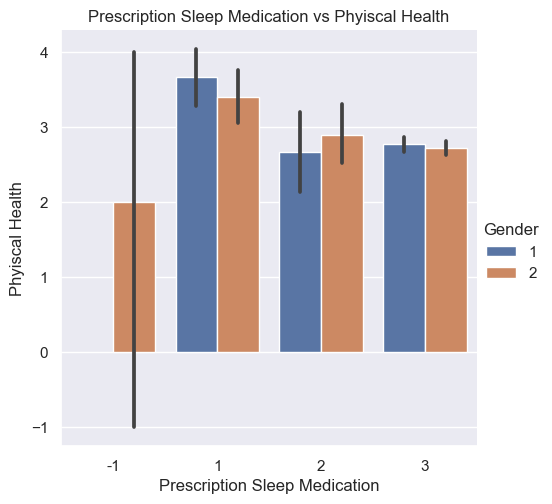

In [17]:
sns.catplot(data=df, x="Prescription Sleep Medication", y="Phyiscal Health", hue="Gender", kind="bar")
plt.title("Prescription Sleep Medication vs Phyiscal Health")
plt.show()

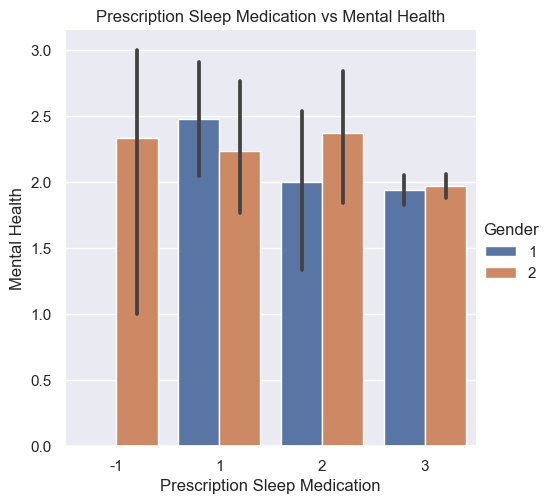

In [18]:
sns.catplot(data=df, x="Prescription Sleep Medication", y="Mental Health", hue="Gender", kind="bar")
plt.title("Prescription Sleep Medication vs Mental Health")
plt.show()

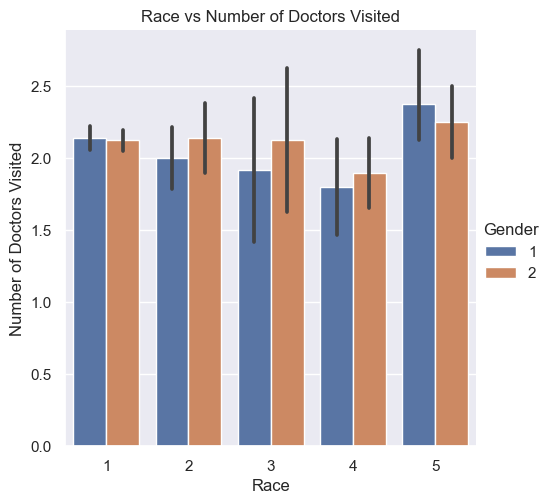

In [19]:
sns.catplot(data=df, x="Race", y="Number of Doctors Visited", hue="Gender", kind="bar")
plt.title("Race vs Number of Doctors Visited")
plt.show()

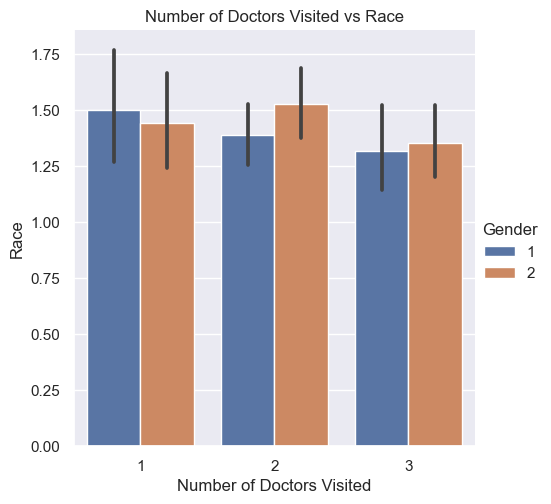

In [20]:
sns.catplot(data=df, x="Number of Doctors Visited", y="Race", hue="Gender", kind="bar")
plt.title("Number of Doctors Visited vs Race")
plt.show()

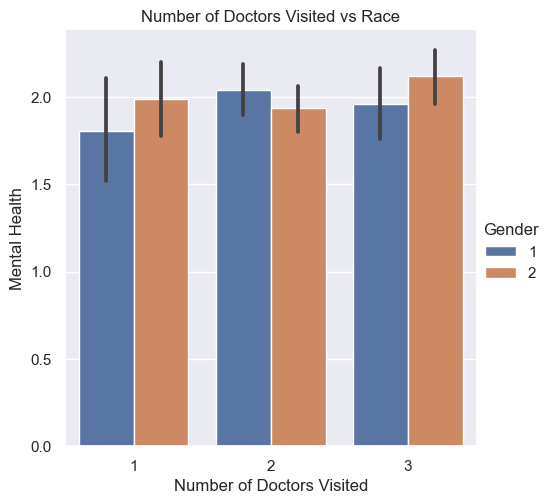

In [21]:
sns.catplot(data=df, x="Number of Doctors Visited", y="Mental Health", hue="Gender", kind="bar")
plt.title("Number of Doctors Visited vs Race")
plt.show()

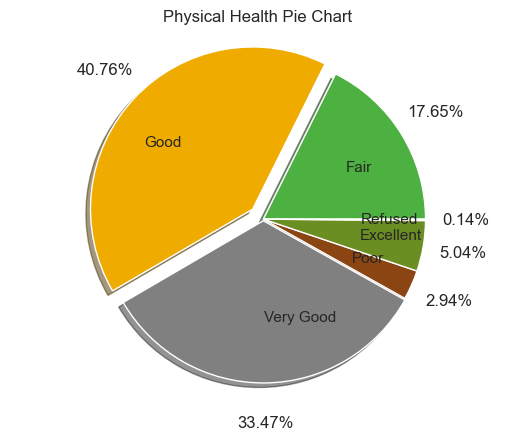

In [22]:
# PIE CHART
outcome=[4,3,2,5,1,-1]
counts=[126,291,239,21,36,1]
plt.pie(counts, labels=["Fair","Good", "Very Good", "Poor","Excellent","Refused"], autopct="%1.2f%%", colors=["#4CB140","#F0AB00","gray","saddlebrown","olivedrab"], explode=[0,0.09,0.01,0,0,0], pctdistance=1.25,shadow=True, labeldistance=.6)
plt.title("Physical Health Pie Chart")
plt.axis("equal")
plt.show()

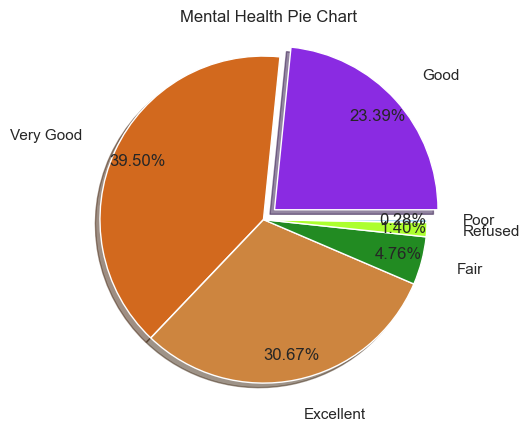

In [23]:
# PIE CHART
outcome=[3,2,1,4,-1,5]
counts=[167,282,219,34,10,2]
label=["Good","Very Good","Excellent","Fair","Refused","Poor"]
plt.pie(counts, labels=label, autopct="%1.2f%%", colors=["blueviolet","chocolate","peru","forestgreen","greenyellow","skyblue"], explode=[0.09,0.001,0,0,0,0],pctdistance=0.85,shadow=True, labeldistance=1.22)
plt.title("Mental Health Pie Chart")
plt.axis("equal")
plt.show()

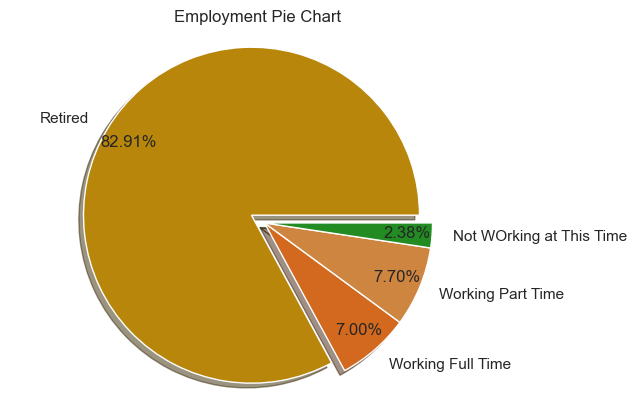

In [24]:
# PIE CHART
outcome=[3,1,2,4]
counts=[592,50,55,17]
label=["Retired","Working Full Time","Working Part Time","Not WOrking at This Time"]
plt.pie(counts, labels=label, autopct="%1.2f%%", colors=["darkgoldenrod","chocolate","peru","forestgreen"], explode=[0.09,0,0,0], pctdistance=0.85,shadow=True, labeldistance=1.125)
plt.title("Employment Pie Chart")
plt.axis("equal")
plt.show()

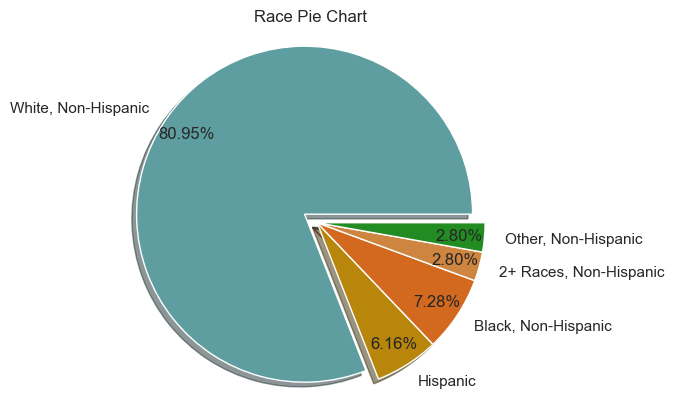

In [25]:
# PIE CHART
outcome=[1,4,2,5,3]
counts=[578,44,52,20,20]
label=["White, Non-Hispanic","Hispanic","Black, Non-Hispanic","2+ Races, Non-Hispanic","Other, Non-Hispanic"]
plt.pie(counts, labels=label, autopct="%1.2f%%", colors=["cadetblue","darkgoldenrod","chocolate","peru","forestgreen"], explode=[0.09,0,0,0,0], pctdistance=0.85,shadow=True, labeldistance=1.12)
plt.title("Race Pie Chart")
plt.axis("equal")
plt.show()

## Model Building

In [26]:
# spliting data into train and test
x=df.drop("Number of Doctors Visited", axis=1)
y=df["Number of Doctors Visited"]

In [27]:
x_encoded=pd.get_dummies(x, columns=["Phyiscal Health","Mental Health","Dental Health","Employment","Trouble Sleeping","Prescription Sleep Medication","Race"])
x_encoded

,Age,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Gender,Phyiscal Health_-1,Phyiscal Health_1,Phyiscal Health_2,...,Trouble Sleeping_3,Prescription Sleep Medication_-1,Prescription Sleep Medication_1,Prescription Sleep Medication_2,Prescription Sleep Medication_3,Race_1,Race_2,Race_3,Race_4,Race_5
0,2,0,0,0,0,1,2,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,2,1,0,0,1,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,2,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,2,0,0,0,1,0,2,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,2,1,0,0,0,0,2,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
710,2,1,0,0,0,1,2,0,0,1,...,0,0,0,0,1,1,0,0,0,0
711,2,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
712,2,1,0,1,1,1,2,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [28]:
x_train, x_test, y_train, y_test=train_test_split(x_encoded,y,stratify=y, random_state=42, test_size=0.3)
LR=LogisticRegression(max_iter=2000)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [29]:
y_pred_test_LR=LR.predict(x_test)
y_pred_train_LR=LR.predict(x_train)

In [30]:
print(confusion_matrix(y_test, y_pred_test_LR))
print(classification_report(y_test, y_pred_test_LR))

[[  2  35   2]
 [  3 104   5]
 [  2  52  10]]
              precision    recall  f1-score   support

           1       0.29      0.05      0.09        39
           2       0.54      0.93      0.69       112
           3       0.59      0.16      0.25        64

    accuracy                           0.54       215
   macro avg       0.47      0.38      0.34       215
weighted avg       0.51      0.54      0.45       215



In [31]:
print(confusion_matrix(y_train, y_pred_train_LR))
print(classification_report(y_train, y_pred_train_LR))

[[  7  77   8]
 [  4 239  17]
 [  2 119  26]]
              precision    recall  f1-score   support

           1       0.54      0.08      0.13        92
           2       0.55      0.92      0.69       260
           3       0.51      0.18      0.26       147

    accuracy                           0.55       499
   macro avg       0.53      0.39      0.36       499
weighted avg       0.54      0.55      0.46       499



## Decision Tree Classifier

In [32]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
y_pred_test_dtc=dtc.predict(x_test)
y_pred_train_dtc=dtc.predict(x_train)

In [34]:
print(confusion_matrix(y_test, y_pred_test_dtc))
print(classification_report(y_test, y_pred_test_LR))

[[11 16 12]
 [33 56 23]
 [14 36 14]]
              precision    recall  f1-score   support

           1       0.29      0.05      0.09        39
           2       0.54      0.93      0.69       112
           3       0.59      0.16      0.25        64

    accuracy                           0.54       215
   macro avg       0.47      0.38      0.34       215
weighted avg       0.51      0.54      0.45       215



In [35]:
print(confusion_matrix(y_train, y_pred_train_dtc))
print(classification_report(y_train, y_pred_train_dtc))

[[ 90   2   0]
 [ 10 249   1]
 [  7   9 131]]
              precision    recall  f1-score   support

           1       0.84      0.98      0.90        92
           2       0.96      0.96      0.96       260
           3       0.99      0.89      0.94       147

    accuracy                           0.94       499
   macro avg       0.93      0.94      0.93       499
weighted avg       0.95      0.94      0.94       499



In [36]:
# tunning Hyperparameter
params={
    "max_depth":[2,5,10,15],
    "min_samples_leaf":[2,5,10,15],
    "min_samples_split":[2,5,10,15]
}

In [37]:
rcv=RepeatedKFold(n_splits=10, n_repeats=5)

gridstc=GridSearchCV(estimator=dtc, param_grid=params, cv=rcv, scoring="accuracy")
gridstc.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [38]:
gridstc.best_params_

{'max_depth': 2, 'min_samples_leaf': 15, 'min_samples_split': 2}

In [39]:
# 2nd tunning
params2={
    "max_depth":range(1,5),
    "min_samples_leaf":range(20,30),
    "min_samples_split":range(1,5)
}

In [40]:
rcv=RepeatedKFold(n_splits=10, n_repeats=5)

gridstc2=GridSearchCV(estimator=dtc, param_grid=params2, cv=rcv, scoring="accuracy")
gridstc2.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': range(20, 30),
                         'min_samples_split': range(1, 5)},
             scoring='accuracy')

In [41]:
gridstc2.best_params_

{'max_depth': 1, 'min_samples_leaf': 28, 'min_samples_split': 1}

In [42]:
# final Decision Tree Model
clf_dt=DecisionTreeClassifier(max_depth=1, min_samples_leaf=27, min_samples_split=1)
clf_dt=clf_dt.fit(x_train, y_train)

In [43]:
y_pred_test_clf_df=clf_dt.predict(x_test)
y_pred_train_clf_df=clf_dt.predict(x_train)

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test_clf_df, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_test_clf_df,average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_test_clf_df, average='weighted', zero_division=1)
print(precision)
print(recall)
print(f1)

0.6369824163357913
0.5348837209302325
0.4065137692897945


In [83]:
precision2 = precision_score(y_train, y_pred_train_clf_df, average='weighted', zero_division=1)
recall2 = recall_score(y_train, y_pred_train_clf_df,average='weighted', zero_division=1)
f12 = f1_score(y_train, y_pred_train_clf_df, average='weighted', zero_division=1)
print(precision2)
print(recall2)
print(f12)

0.615427245148471
0.5250501002004008
0.4026142572422547


In [84]:
print(confusion_matrix(y_test, y_pred_test_clf_df))
print(classification_report(y_test, y_pred_test_clf_df))

[[  0  38   1]
 [  0 109   3]
 [  0  58   6]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        39
           2       0.53      0.97      0.69       112
           3       0.60      0.09      0.16        64

    accuracy                           0.53       215
   macro avg       0.38      0.36      0.28       215
weighted avg       0.46      0.53      0.41       215



C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(confusion_matrix(y_train, y_pred_train_clf_df))
print(classification_report(y_train, y_pred_train_clf_df))

[[  0  92   0]
 [  0 247  13]
 [  0 132  15]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        92
           2       0.52      0.95      0.68       260
           3       0.54      0.10      0.17       147

    accuracy                           0.53       499
   macro avg       0.35      0.35      0.28       499
weighted avg       0.43      0.53      0.40       499



C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


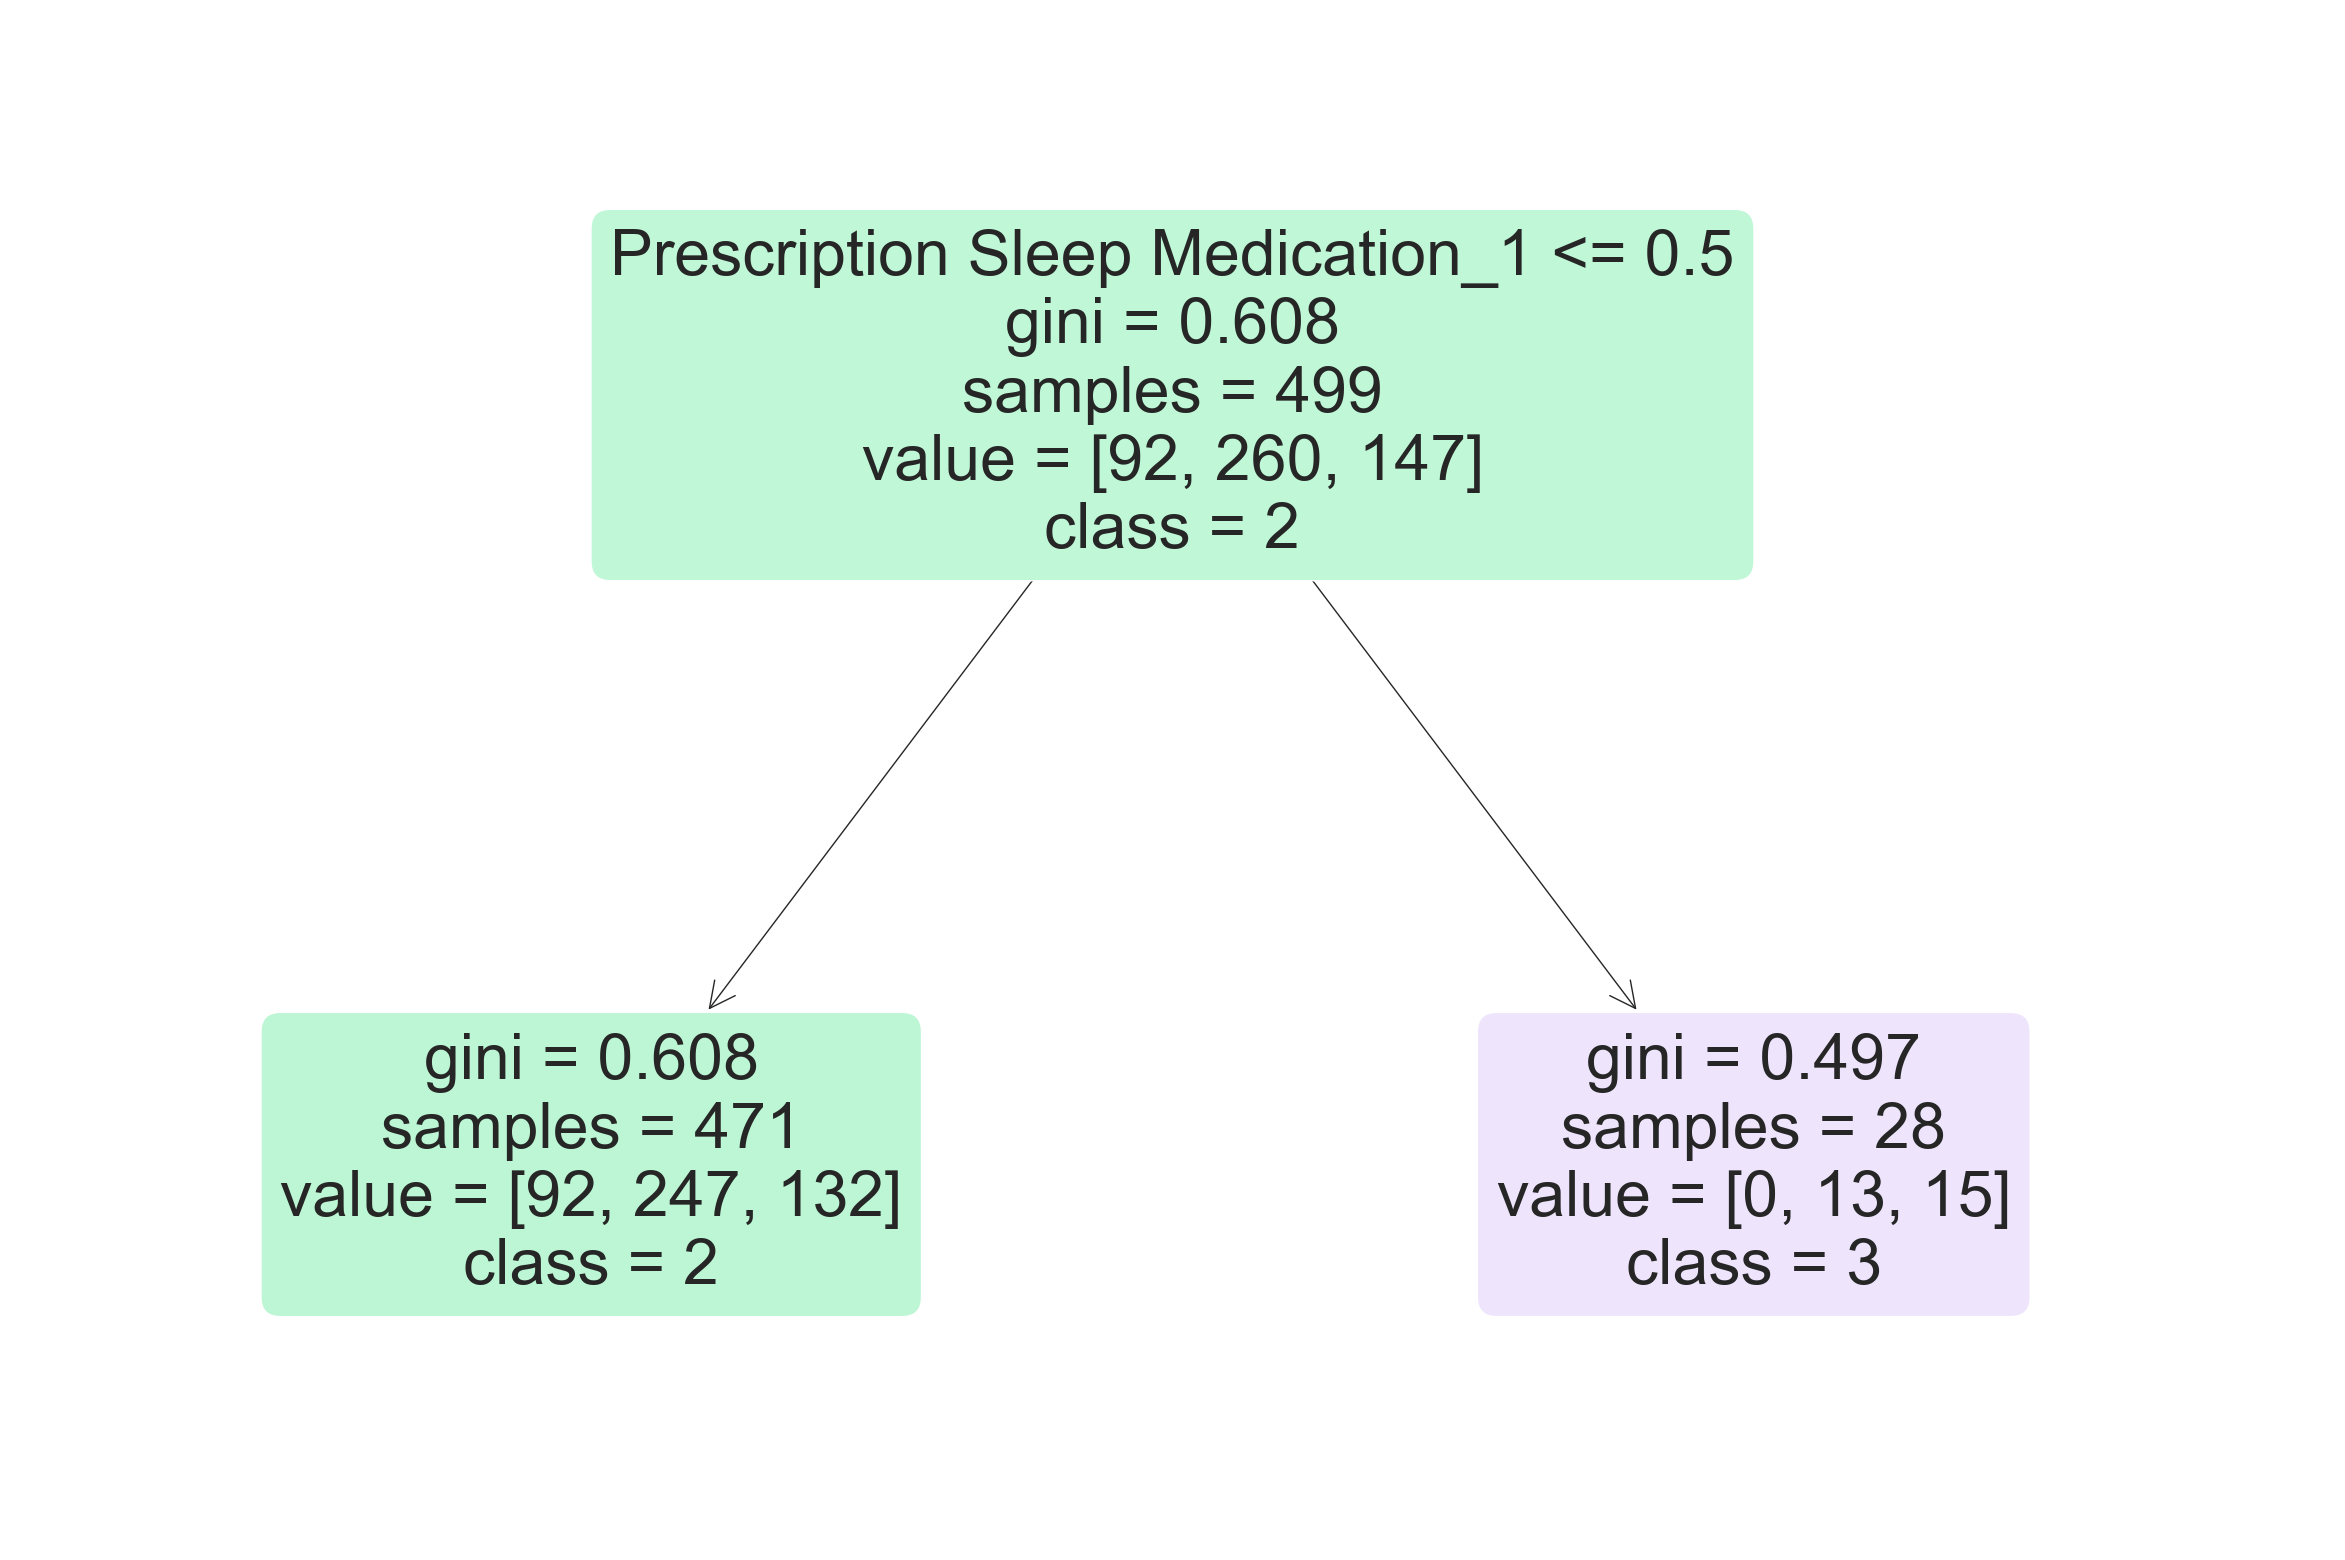

In [86]:
plt.figure(figsize=(30, 20))

plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["1", "2","3"],
          feature_names=x_encoded.columns);

## Gradient Boosting

In [47]:
gbc= GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
y_pred_test_gbc=gbc.predict(x_test)
y_pred_train_gbc=gbc.predict(x_train)

In [49]:
print(confusion_matrix(y_test, y_pred_test_gbc))
print(classification_report(y_test, y_pred_test_gbc))

[[ 1 30  8]
 [ 5 96 11]
 [ 2 48 14]]
              precision    recall  f1-score   support

           1       0.12      0.03      0.04        39
           2       0.55      0.86      0.67       112
           3       0.42      0.22      0.29        64

    accuracy                           0.52       215
   macro avg       0.37      0.37      0.33       215
weighted avg       0.44      0.52      0.44       215



In [50]:
print(confusion_matrix(y_train, y_pred_train_gbc))
print(classification_report(y_train, y_pred_train_gbc))

[[ 25  65   2]
 [  0 254   6]
 [  1  83  63]]
              precision    recall  f1-score   support

           1       0.96      0.27      0.42        92
           2       0.63      0.98      0.77       260
           3       0.89      0.43      0.58       147

    accuracy                           0.69       499
   macro avg       0.83      0.56      0.59       499
weighted avg       0.77      0.69      0.65       499



In [51]:
# HYperparamter tunning for Gradient Boosting
param3={
    "max_depth":[2,3,5,10],
    "min_samples_leaf":[5,10,20,50],
    "n_estimators":[10,15],
    "learning_rate":[0.1,0.2,0.3]
}

In [59]:
grid_gbc=GridSearchCV(estimator=gbc, param_grid=param3,cv=rcv, scoring="accuracy")
grid_gbc.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 15]},
             scoring='accuracy')

In [60]:
grid_gbc.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 50,
 'n_estimators': 10}

In [61]:
y_pred_test_grid_gbc=grid_gbc.predict(x_test)
y_pred_train_grid_gbc=grid_gbc.predict(x_train)

In [63]:
print(confusion_matrix(y_test, y_pred_test_grid_gbc))
print(classification_report(y_test, y_pred_test_grid_gbc))

[[  0  39   0]
 [  0 112   0]
 [  0  64   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        39
           2       0.52      1.00      0.69       112
           3       0.00      0.00      0.00        64

    accuracy                           0.52       215
   macro avg       0.17      0.33      0.23       215
weighted avg       0.27      0.52      0.36       215



C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(confusion_matrix(y_train, y_pred_train_grid_gbc))
print(classification_report(y_train, y_pred_train_grid_gbc))

[[  0  92   0]
 [  0 260   0]
 [  0 147   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        92
           2       0.52      1.00      0.69       260
           3       0.00      0.00      0.00       147

    accuracy                           0.52       499
   macro avg       0.17      0.33      0.23       499
weighted avg       0.27      0.52      0.36       499



C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
